In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparation

In [2]:
def scale(x):
    return np.log(x)
#     return x / 1e6

In [3]:
def prepare_data(x, y):
    data_x = []
    data_y = []
    data_num = []
    for (x1, y1) in zip(x, y):
        if x1 in data_x:
            data_y[data_x.index(x1)] += y1
            data_num[data_x.index(x1)] += 1
        else:
            data_x.append(x1)
            data_y.append(y1)
            data_num.append(1)
    x_ = np.array(data_x)
    y_ = np.array(data_y) / np.array(data_num)
    return x_, y_

In [4]:
def hl_clip(x, y):
    tmp_data = pd.DataFrame({"x":x,"y":y})
    tmp_data = tmp_data[tmp_data.x>8]
    return np.array(tmp_data.x), np.array(tmp_data.y)

In [5]:
def show_graph(data_name, clip):
    data1 = pd.read_csv(data_name, names=["n", "time"])
    x1 = scale(data1.n)
    y1 = data1.time

    x = np.array(x1)
    y = np.array(y1).clip(0, clip)
    print("amount of points:\t", len(x))
    x, y = prepare_data(x, y)
    print("amount of unique points:", len(x))

    plt.figure(dpi=100)
    plt.scatter(x, y, s=1, alpha=1, color="k")

    x2l, y2l = hl_clip(x, y)
    coef, cov = np.polyfit(x2l, y2l, 1, cov=True)
    print()
    print("t ~ k log(N) + c при N > 3000")
    print("k = ({:.2f} +- {:.2f}) ms".format(
        coef[0] * 1000, cov[0][0]**0.5 * 1000))
    f = np.poly1d(coef)

    x_ = np.linspace(0, max(x), 10)
    plt.plot(x_, f(x_), 
             linewidth=5, alpha=0.5,
             color="green", label="$\\mathrm{LS\\ approximation}$")

    plt.xlabel("$\\log\\ {N}$")
    plt.ylabel("$t, \\mathrm{ns}$")
    plt.title("t = ({:.2f} +- {:.2f}) ms * log N + c".format(
        coef[0] * 1000, cov[0][0]**0.5 * 1000))
    plt.legend()
    # plt.ylim(0, 0.1)
    plt.xlim(0, 19)
    plt.ylim(0, max(y)*1.05)
    plt.savefig("figures\\" + data_name[:-4] + ".png")
    plt.show()

## Test AVL structure

amount of points:	 1900
amount of unique points: 640

t ~ k log(N) + c при N > 3000
k = (6.22 +- 0.06) ms


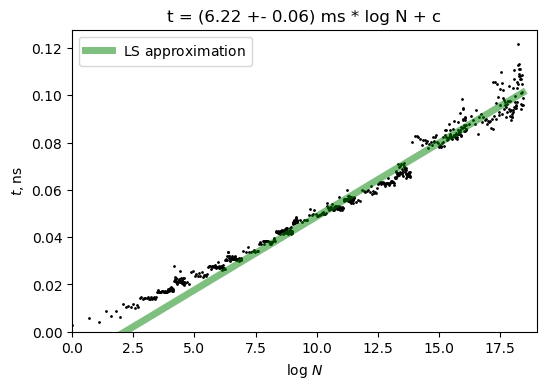

In [6]:
show_graph("AVL_remove.csv", clip=0.8)

amount of points:	 5400
amount of unique points: 3070

t ~ k log(N) + c при N > 3000
k = (11.74 +- 0.07) ms


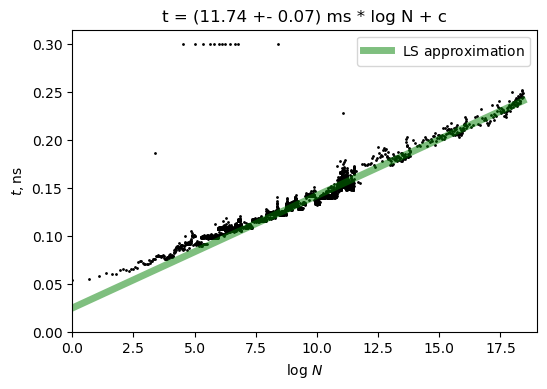

In [7]:
show_graph("AVL_inser_remove.csv", clip=0.3)

amount of points:	 1700
amount of unique points: 640

t ~ k log(N) + c при N > 3000
k = (2.37 +- 0.03) ms


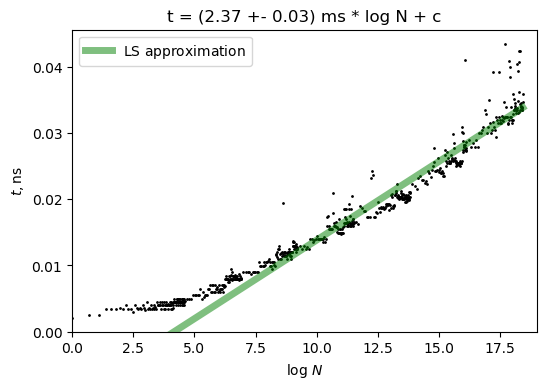

In [8]:
show_graph("AVL_find.csv", clip=1)

## Test RB structure

amount of points:	 7500
amount of unique points: 1934

t ~ k log(N) + c при N > 3000
k = (8.51 +- 0.10) ms


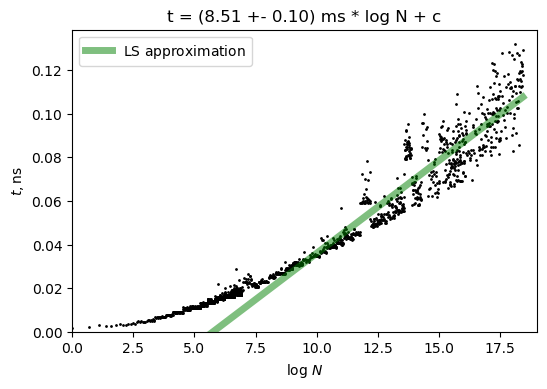

In [9]:
show_graph("RB_remove.csv", clip=0.6)

amount of points:	 2700
amount of unique points: 740

t ~ k log(N) + c при N > 3000
k = (19.58 +- 0.25) ms


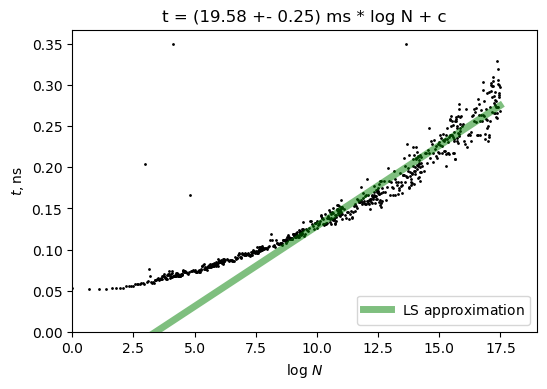

In [10]:
show_graph("RB_inser_remove.csv", clip=0.35)

amount of points:	 2900
amount of unique points: 1663

t ~ k log(N) + c при N > 3000
k = (1.97 +- 0.01) ms


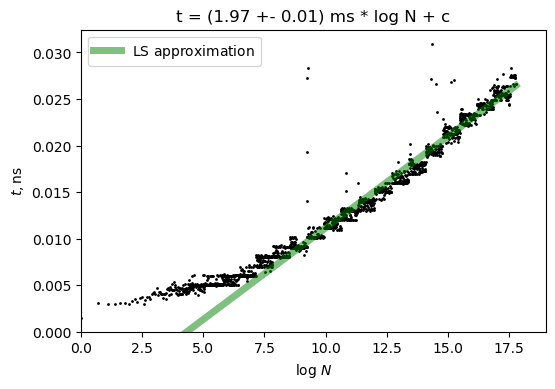

In [11]:
show_graph("RB_find.csv", clip=0.9)